In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import csv
import scipy
import string
import chart_studio
import os
import zipfile
import base64
import warnings
warnings.filterwarnings('ignore')
import sys
import difflib
import re
import webbrowser
from operator import eq
from difflib import SequenceMatcher
from pandas import DataFrame

from collections import OrderedDict
from functools import reduce
from scipy.stats import mode

from sklearn.metrics import mean_squared_error
from functools import wraps
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import  BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from datetime import date
from datetime import datetime
from datetime import timezone

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', AdaBoostClassifier()))
models.append(('NN', MLPClassifier()))
models.append(('SVM', SVC()))

In [2]:
df_wines = pd.read_csv(r'C:\Users\USER\Desktop\Lopes\winequality.csv', encoding = "latin1")

In [3]:
df_wines

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1001.00000,3.00,0.45,8.8,6
1,White,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


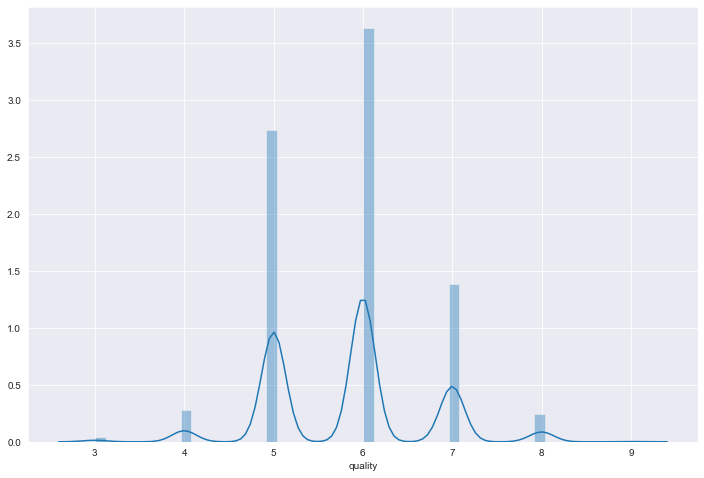

In [4]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df_wines.quality)

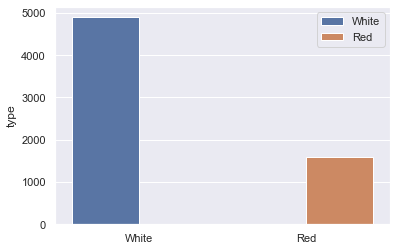

In [5]:
sns.set(style="darkgrid")
quant = df_wines[u'type'].unique()
cont = df_wines[u'type'].value_counts()
sns.barplot(x=quant,y=cont,hue=quant)

In [6]:
df_wines.groupby('type')[u'quality'].value_counts()

type   quality
Red    5           681
       6           638
       7           199
       4            53
       8            18
       3            10
White  6          2198
       5          1457
       7           880
       8           175
       4           163
       3            20
       9             5
Name: quality, dtype: int64

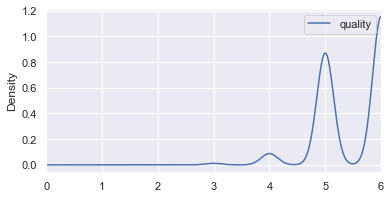

In [7]:
df_wines.plot.density(y='quality',xlim=[0,6],figsize=[6,3])

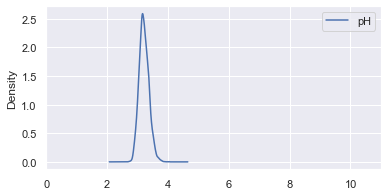

In [8]:
df_wines.plot.density(y='pH',xlim=[0,11],figsize=[6,3])

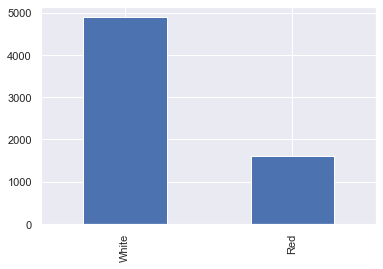

In [9]:
df_wines.type.value_counts().plot(kind='bar')

In [10]:
df_wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.032024,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.162595,-0.252700,0.299568,-0.030977,-0.076743
volatile acidity,0.032024,1.000000,-0.025158,-0.014590,0.023690,-0.029908,-0.031360,-0.002740,0.020652,0.000863,-0.001449,-0.054251
citric acid,0.324436,-0.025158,1.000000,0.142451,0.038998,0.133126,0.195242,0.059460,-0.329808,0.056197,-0.003370,0.085532
residual sugar,-0.111981,-0.014590,0.142451,1.000000,-0.128940,0.402871,0.495482,0.177294,-0.267320,-0.185927,0.000304,-0.036980
chlorides,0.298195,0.023690,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.062246,0.044708,0.395593,0.002091,-0.200666
free sulfur dioxide,-0.282735,-0.029908,0.133126,0.402871,-0.195045,1.000000,0.720934,0.029391,-0.145854,-0.188457,0.019904,0.055463
total sulfur dioxide,-0.329054,-0.031360,0.195242,0.495482,-0.279630,0.720934,1.000000,0.030896,-0.238413,-0.275727,0.021439,-0.041385
density,0.162595,-0.002740,0.059460,0.177294,0.062246,0.029391,0.030896,1.000000,-0.053118,0.063952,-0.004810,-0.029857
pH,-0.252700,0.020652,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,-0.053118,1.000000,0.192123,-0.001491,0.019506
sulphates,0.299568,0.000863,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.063952,0.192123,1.000000,-0.002403,0.038485


In [11]:
df_white = df_wines[df_wines['type'] == "White"]
df_red = df_wines[df_wines['type'] == "Red"]

In [12]:
df_white

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1001.00000,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
df_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.051375,0.289181,0.089021,0.023086,-0.049396,0.091070,0.074106,-0.425858,-0.017143,-0.043821,-0.113663
volatile acidity,0.051375,1.000000,0.013797,-0.013602,0.000644,-0.001780,0.016299,-0.001094,-0.016138,-0.000232,-0.000698,-0.031648
citric acid,0.289181,0.013797,1.000000,0.094212,0.114364,0.094077,0.121131,0.050856,-0.163748,0.062331,0.000967,-0.009209
residual sugar,0.089021,-0.013602,0.094212,1.000000,0.088685,0.299098,0.401439,0.226319,-0.194133,-0.026664,-0.005874,-0.097577
chlorides,0.023086,0.000644,0.114364,0.088685,1.000000,0.101392,0.198910,0.027344,-0.090439,0.016763,0.012780,-0.209934
free sulfur dioxide,-0.049396,-0.001780,0.094077,0.299098,0.101392,1.000000,0.615501,0.046942,-0.000618,0.059217,0.023405,0.008158
total sulfur dioxide,0.091070,0.016299,0.121131,0.401439,0.198910,0.615501,1.000000,0.099828,0.002321,0.134562,0.021730,-0.174737
density,0.074106,-0.001094,0.050856,0.226319,0.027344,0.046942,0.099828,1.000000,-0.043740,0.053886,-0.004331,-0.026099
pH,-0.425858,-0.016138,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.043740,1.000000,0.155951,-0.001573,0.099427
sulphates,-0.017143,-0.000232,0.062331,-0.026664,0.016763,0.059217,0.134562,0.053886,0.155951,1.000000,0.002003,0.053678


In [14]:
df_red

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,Red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,Red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,Red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.001996,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.266354,-0.682978,0.183006,-0.021913,0.124052
volatile acidity,-0.001996,1.000000,-0.033493,0.044796,0.000546,-0.029612,-0.014078,-0.007163,0.024662,-0.040616,-0.002249,-0.090131
citric acid,0.671703,-0.033493,1.000000,0.143577,0.203823,-0.060978,0.035533,0.091127,-0.541904,0.312770,-0.015011,0.226373
residual sugar,0.114777,0.044796,0.143577,1.000000,0.055610,0.187049,0.203028,0.301374,-0.085652,0.005527,0.048402,0.013732
chlorides,0.093705,0.000546,0.203823,0.055610,1.000000,0.005562,0.047400,0.074370,-0.265026,0.371260,-0.004947,-0.128907
free sulfur dioxide,-0.153794,-0.029612,-0.060978,0.187049,0.005562,1.000000,0.667666,0.093072,0.070377,0.051658,0.004996,-0.050656
total sulfur dioxide,-0.113181,-0.014078,0.035533,0.203028,0.047400,0.667666,1.000000,0.038842,-0.066495,0.042947,0.041494,-0.185100
density,0.266354,-0.007163,0.091127,0.301374,0.074370,0.093072,0.038842,1.000000,-0.127029,0.049089,-0.005548,-0.025787
pH,-0.682978,0.024662,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.127029,1.000000,-0.196648,0.004954,-0.057731
sulphates,0.183006,-0.040616,0.312770,0.005527,0.371260,0.051658,0.042947,0.049089,-0.196648,1.000000,-0.004839,0.251397


In [16]:
df_white = df_white.rename(columns = 
                       {'total sulfur dioxide': 'total_sulfur_dioxide', 'fixed acidity':'fixed_acidity', 'residual sugar':'residual_sugar', 'citric acid':'citric_acid', 'volatile acidity':'volatile_acidity', 'free sulfur dioxide':'free_sulfur_dioxide'})

In [17]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
type                    4898 non-null object
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


In [18]:
df_red = df_red.rename(columns = 
                       {'total sulfur dioxide': 'total_sulfur_dioxide', 'fixed acidity':'fixed_acidity', 'residual sugar':'residual_sugar', 'citric acid':'citric_acid', 'volatile acidity':'volatile_acidity', 'free sulfur dioxide':'free_sulfur_dioxide'})

In [19]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 4898 to 6496
Data columns (total 13 columns):
type                    1599 non-null object
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 174.9+ KB


In [20]:
# Linhas duplicadas existem nos conjuntos de dados de vinho branco e vinho tinto.
sum(df_white.duplicated())

937

In [21]:
sum(df_red.duplicated())

240

In [22]:
# Valores únicos de 'qualidade' existem no conjunto de dados de vinho tinto e de vinho branco.
df_red['quality'].nunique()

6

In [23]:
df_white['quality'].nunique()

7

In [24]:
df_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4.898000e+03,4898.000000
mean,6.854788,0.483222,0.334192,6.391415,0.045772,35.308085,138.360657,570.852724,3.188267,0.489847,1.823234e+12,5.877909
std,0.843868,14.356450,0.121020,5.072058,0.021848,17.007137,42.498065,6918.444854,0.151001,0.114126,3.468549e+13,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000e+00,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000e+00,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,1.040000e+01,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,1.140000e+01,6.000000
max,14.200000,1005.000000,1.660000,65.800000,0.346000,289.000000,440.000000,103898.000000,3.820000,1.080000,9.733333e+14,9.000000


In [25]:
df_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1599.000000
mean,8.319637,3.879687,0.270976,2.538806,0.087467,15.874922,46.467792,1257.356925,3.311113,0.658149,1.455285e+12,5.636023
std,1.741096,60.015370,0.194801,1.409928,0.047065,10.460157,32.895324,9784.883345,0.154386,0.169507,3.370300e+13,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000e+00,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000e+00,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,1.020000e+01,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,1.110000e+01,6.000000
max,15.900000,1185.000000,1.000000,15.500000,0.611000,72.000000,289.000000,100369.000000,4.010000,2.000000,9.566667e+14,8.000000


In [26]:
# Crindo duas matrizes numpy.
color_red = np.repeat('red', 1599)
color_white = np.repeat('white', 4898)

In [27]:
# Adicionando às matrizes.
df_red['color'] = color_red
df_white['color'] = color_white

In [28]:
# Combinando os dataframes.
df_wines = df_red.append(df_white, ignore_index=True) 
df_wines

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [29]:
# Salvando o Dataframe combinado.
df_wines.to_csv('winequality_new.csv', index=False)

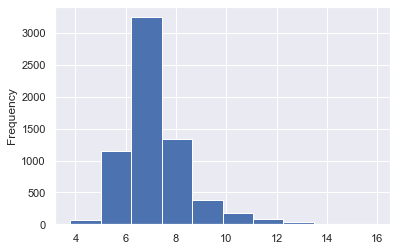

In [30]:
# Criando um histograma - Acidez fixa, total de dióxido de enxofre, pH, álcool
df_wines['fixed_acidity'].plot(kind='hist')

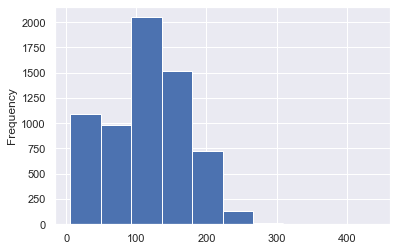

In [31]:
df_wines['total_sulfur_dioxide'].plot(kind='hist')

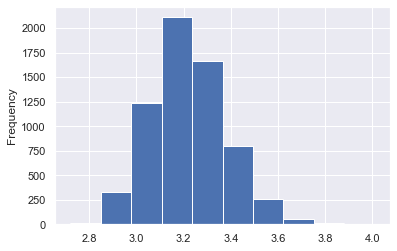

In [32]:
df_wines['pH'].plot(kind='hist')

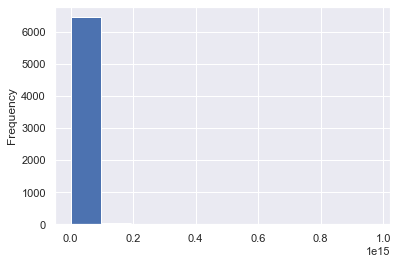

In [33]:
df_wines['alcohol'].plot(kind='hist')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

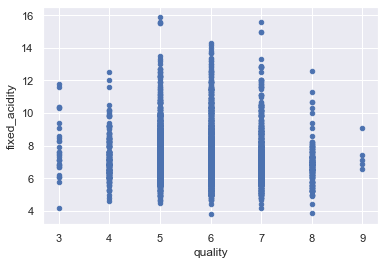

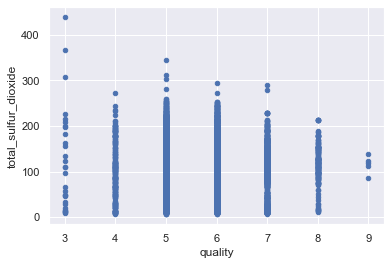

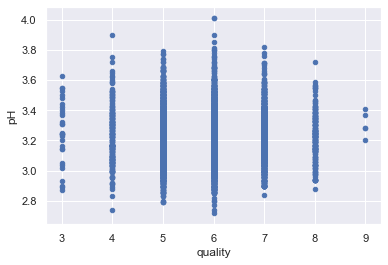

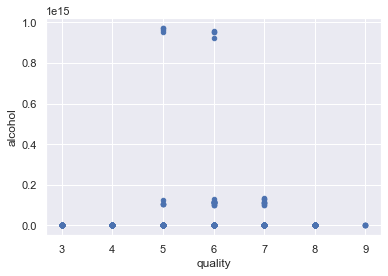

In [34]:
# Criando um scatter plot - Qualidade vs. Acidez fixa, total de dióxido de enxofre, pH, álcool
df_wines.plot(x='quality', y='fixed_acidity', kind='scatter') 
df_wines.plot(x='quality', y='total_sulfur_dioxide', kind='scatter') 
df_wines.plot(x='quality', y='pH', kind='scatter')
df_wines.plot(x='quality', y='alcohol', kind='scatter') #isso parece mais provável que tenha um impacto positivo na qualidade.

In [35]:
# Agrupando os dados e agregando informações sobre esses grupos, executando a transformação específica do grupo.
# Calculando a média para as seguintes características: acidez fixa, total de dióxido de enxofre , pH, álcool - para todas as amostras.
# Classificação de qualidade. Nível médio de pH para todas as amostras com classificação de qualidade.
df_wines.mean()
df_wines.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,39.977500,0.281000,5.140000,0.077033,39.216667,122.033333,667.895714,3.257667,0.506333,1.021500e+01
4,7.288889,10.262963,0.272315,4.153704,0.060056,20.636574,103.432870,515.008714,3.231620,0.505648,1.018009e+01
5,7.326801,1.821763,0.307722,5.804116,0.064666,30.237371,120.839102,1099.579079,3.212189,0.526403,2.061272e+12
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,667.479710,3.217726,0.532549,2.008463e+12
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,381.086721,3.228072,0.547025,1.069694e+12
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,104.671264,3.223212,0.512487,1.167876e+01
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,1.218000e+01


In [36]:
# Dividindo em variáveis categóricas.
df_wines.groupby(['quality','color']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red         8.360000        119.266000     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245         21.710660     0.174151        2.694340   
        white       7.129448          6.540706     0.304233        4.628221   
5       red         8.167254          5.073275     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
quality color                                                         
3       red     0.122500            11.000000             24.900000   
        white   0.054300            53.325000            170.600000   
4       red     0.090679            12.264151             36.245283   
        white   0.050098            23.358896            125.279141   
5       red     0.092736            16.983847             56.513950   
        white   0.051546            36.432052            150.904598   
6       red     0.084956            15.711599             40.869906   
        white   0.045217            35.650591            137.047316   
7       red     0.076588            14.045226             35.020101   
        white   0.038191            34.125568            125.114773   
8       red     0.068444            13.277778             33.444444   
        white   0.038314            36.720000            126.165714   
9       white   0.027400            33.400000            116.000000   

                   density        pH  sulphates       alcohol  
quality color                                                  
3       red    1001.697384  3.398000   0.570000  9.955000e+00  
        white   500.994879  3.187500   0.474500  1.034500e+01  
4       red    1907.109726  3.381509   0.596415  1.026509e+01  
        white    62.362372  3.182883   0.476135  1.015245e+01  
5       red    1608.715118  3.304949   0.620969  9.899706e+00  
        white   861.609523  3.168833   0.482203  3.024708e+12  
6       red     836.316316  3.318072   0.675329  3.434692e+12  
        white   618.472542  3.188599   0.491106  1.594480e+12  
7       red    1358.277462  3.290754   0.741256  6.817420e+11  
        white   160.108360  3.213898   0.503102  1.157424e+12  
8       red       0.995212  3.267222   0.767778  1.209444e+01  
        white   115.335086  3.218686   0.486229  1.163600e+01  
9       white     0.991460  3.308000   0.466000  1.218000e+01

In [37]:
# Verificando a qualidade média para cada tipo de vinho (Branco ou Tinto).
df_wines.groupby('color').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.319637,3.879687,0.270976,2.538806,0.087467,15.874922,46.467792,1257.356925,3.311113,0.658149,1.455285e+12,5.636023
white,6.854788,0.483222,0.334192,6.391415,0.045772,35.308085,138.360657,570.852724,3.188267,0.489847,1.823234e+12,5.877909


In [38]:
# Verificando nível de acidez (valor de pH) que recebe a classificação média mais alta. 
# Veja os valores mínimo, 25%, 50%, 75% e máximo de pH.
df_wines['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [39]:
# Criando nova coluna com Níveis de Acidez.
bin_edges = [2.72,3.11,3.21,3.32,4.01] 
bin_names = ['very_high','high','medium','low'] 
df_wines['acidity_levels'] = pd.cut(df_wines['pH'], bin_edges, labels=bin_names)
df_wines.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,high
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [40]:
# Analisando a qualidade média de cada nível de acidez por tipo de vinho.
df_wines.groupby('acidity_levels')['quality'].mean()

acidity_levels
very_high    5.783343
high         5.784540
medium       5.850832
low          5.859593
Name: quality, dtype: float64

In [41]:
# Obtendo a quantidade média de teor de álcool no vinho.
df_wines['alcohol'].median()

10.3

In [42]:
# Determinando amostras com teor alcoólico menor que a mediana e maior que ou igual à mediana
low_alcohol = df_wines[df_wines['alcohol'] < 10.3]
low_alcohol = df_wines.query('alcohol < 10.3')

In [43]:
high_alcohol = df_wines[df_wines['alcohol'] >= 10.3]
high_alcohol = df_wines.query('alcohol >= 10.3')

In [44]:
# Tratando a unicidade das amostras.
num_samples = df_wines.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # Deve resultar VERDADEIRO.

True

In [45]:
# Verificando a classificação média de qualidade para os grupos com baixo teor de álcool e alto teor de álcool.
low_alcohol['quality'].mean()

5.474399494310998

In [46]:
high_alcohol['quality'].mean()

6.1449144914491445

In [47]:
# Verificando a quantidade mediana de açúcar residual.
df_wines['residual_sugar'].median()

3.0

In [48]:
# Determinando amostras com açúcar residual menor que a mediana e maior que ou igual à mediana.

low_sugar = df_wines.query('residual_sugar < 3')
low_sugar = df_wines[df_wines['residual_sugar'] < 3] 

high_sugar = df_wines.query('residual_sugar >= 3')
high_sugar = df_wines[df_wines['residual_sugar'] >= 3]

# Tratando a unicidade das amostras.
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # Deve resultar VERDADEIRO.

True

In [49]:
# Verificando a classificação média de qualidade para os grupos com baixo teor de açúcar e alto teor de açúcar
low_sugar['quality'].mean()

5.808800743724822

In [50]:
high_sugar['quality'].mean()

5.82782874617737

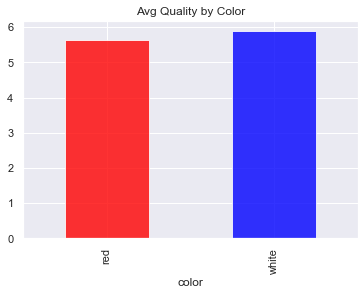

In [51]:
# Analisando graficamente a associação (correlação) entre a qualidade e as propriedades dos vinhos por tpo.
df_wines.groupby('color')['quality'].mean().plot(kind='bar', title='Avg Quality by Color', color = ['red', 'blue'] , alpha=0.8)

Text(0, 0.5, 'Quality')

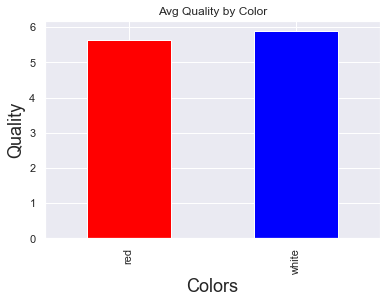

In [52]:
colors=['red', 'blue'] 
color_means = df_wines.groupby('color')['quality'].mean()
color_means.plot(kind='bar', title='Avg Quality by Color', color = colors)

plt.xlabel('Colors', fontsize=18)
plt.ylabel('Quality', fontsize=18)

In [53]:
# Avaliando as diferenças.
counts = df_wines.groupby(['quality', 'color']).count(); counts

type  fixed_acidity  volatile_acidity  citric_acid  \
quality color                                                       
3       red      10             10                10           10   
        white    20             20                20           20   
4       red      53             53                53           53   
        white   163            163               163          163   
5       red     681            681               681          681   
        white  1457           1457              1457         1457   
6       red     638            638               638          638   
        white  2198           2198              2198         2198   
7       red     199            199               199          199   
        white   880            880               880          880   
8       red      18             18                18           18   
        white   175            175               175          175   
9       white     5              5                 5            5   

               residual_sugar  chlorides  free_sulfur_dioxide  \
quality color                                                   
3       red                10         10                   10   
        white              20         20                   20   
4       red                53         53                   53   
        white             163        163                  163   
5       red               681        681                  681   
        white            1457       1457                 1457   
6       red               638        638                  638   
        white            2198       2198                 2198   
7       red               199        199                  199   
        white             880        880                  880   
8       red                18         18                   18   
        white             175        175                  175   
9       white               5          5                    5   

               total_sulfur_dioxide  density    pH  sulphates  alcohol  \
quality color                                                            
3       red                      10       10    10         10       10   
        white                    20       20    20         20       20   
4       red                      53       53    53         53       53   
        white                   163      163   163        163      163   
5       red                     681      681   681        681      681   
        white                  1457     1457  1457       1457     1457   
6       red                     638      638   638        638      638   
        white                  2198     2198  2198       2198     2198   
7       red                     199      199   199        199      199   
        white                   880      880   880        880      880   
8       red                      18       18    18         18       18   
        white                   175      175   175        175      175   
9       white                     5        5     5          5        5   

               acidity_levels  
quality color                  
3       red                10  
        white              20  
4       red                53  
        white             163  
5       red               681  
        white            1457  
6       red               638  
        white            2197  
7       red               199  
        white             880  
8       red                18  
        white             175  
9       white               5

Text(0, 0.5, 'Count')

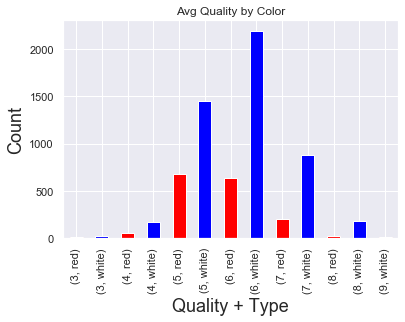

In [54]:
# Visualisando...
colors=['red', 'blue'] 

counts = df_wines.groupby(['quality', 'color']).count()['pH']  #the values for all columns are the same...coz it's a count! 
counts.plot(kind='bar', title='Avg Quality by Color', color=colors)

plt.xlabel('Quality + Type', fontsize=18) 
plt.ylabel('Count', fontsize=18)

Text(0, 0.5, 'Proportion')

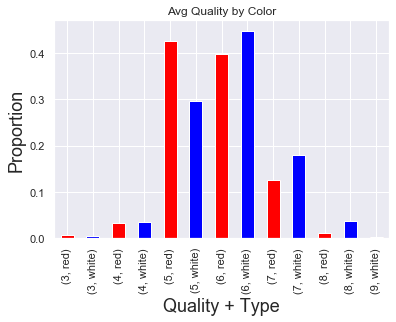

In [55]:
# Usando a proporcionalidade de amostras para os tipos de Vinho Branco e Tinto para equilibrar as "proporções".
colors=['red', 'blue'] 
counts = df_wines.groupby(['quality', 'color']).count()['pH']
total = df_wines.groupby('color').count()['pH']
prop = counts / total
prop.plot(kind='bar', title='Avg Quality by Color', color=colors)

plt.xlabel('Quality + Type', fontsize=18) 
plt.ylabel('Proportion', fontsize=18)

# Como pode ser visto, para as classificações mais baixas -3/4/5, Tinto = 'vermelho' mostra uma proporção maior. e para as classificações mais altas, o inverso é verdadeiro.

In [56]:
# Analisando as classificações de acordo com a característica 'Teor de Álcool' dos tipos de vinho e avaliando a qualidade média.
a_median = df_wines['alcohol'].median()
a_low = df_wines.query('alcohol < {}'.format(a_median))
a_high = df_wines.query('alcohol >= {}'.format(a_median))

mean_qual_low = a_low['quality'].mean()
mean_qual_high = a_high['quality'].mean()

Text(0, 0.5, 'Average Quality Rating')

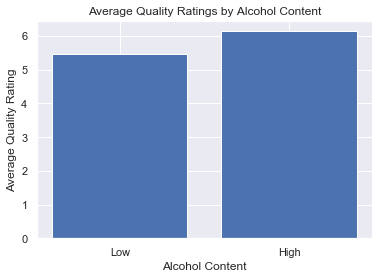

In [57]:
# Ciando gráfico de barras.
rangeis = [1, 2]
heights = [mean_qual_low, mean_qual_high]
labels = ['Low', 'High']
plt.bar(rangeis, heights, tick_label=labels)

plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')

In [58]:
# Analisando as classificações de acordo com a característica 'Teor de Açucar Residual' dos tipos de vinho e avaliando a qualidade média.
s_median = df_wines['residual_sugar'].median()
s_low = df_wines.query('residual_sugar < {}'.format(s_median))
s_high =df_wines.query('residual_sugar >= {}'.format(s_median))

mean_qual_low = s_low['quality'].mean()
mean_qual_high = s_high['quality'].mean()

Text(0, 0.5, 'Average Quality Rating')

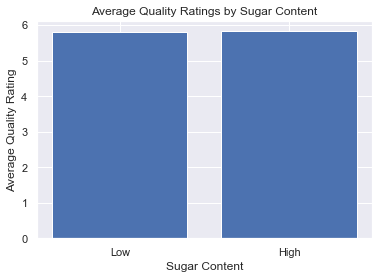

In [59]:
# Criando gráfico d barras.
rangeis = [1, 2]
heights = [mean_qual_low, mean_qual_high]
labels = ['Low', 'High']
plt.bar(rangeis, heights, tick_label=labels)

plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating')

In [60]:
# Analisando as classificações de acordo com a característica 'Nível de Acidez' dos tipos de vinho e avaliando a qualidade média.
# Dividindo a classificação de Acidez em quatro níveis.
df_wines['pH'].describe()
bin_edges = [2.72,3.11,3.21,3.32,4.01] 
bin_names = ['very_high','high','medium','low'] 

df_wines['acidity_levels'] = pd.cut(df_wines['pH'], bin_edges, labels=bin_names)

In [61]:
# Verificando a qualidade média de cada nível de acidez.
levels = df_wines.groupby('acidity_levels')['quality'].mean(); levels

acidity_levels
very_high    5.783343
high         5.784540
medium       5.850832
low          5.859593
Name: quality, dtype: float64

In [62]:
mean_qual_low =levels[3]
mean_qual_medium = levels[2]
mean_qual_high = levels[1]
mean_qual_veryhigh = levels[0]

Text(0, 0.5, 'Average Quality Rating')

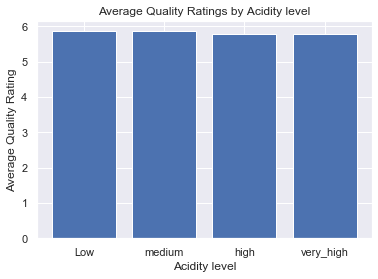

In [63]:
# Criando um gráfico de barras.
rangeis = [1, 2, 3, 4]
heights = [mean_qual_low, mean_qual_medium, mean_qual_high, mean_qual_veryhigh]
labels = ['Low','medium','high','very_high']
plt.bar(rangeis, heights, tick_label=labels)

plt.title('Average Quality Ratings by Acidity level')
plt.xlabel('Acidity level')
plt.ylabel('Average Quality Rating')

Text(0, 0.5, 'Average Quality Rating')

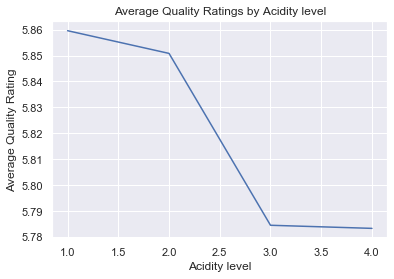

In [64]:
# Comparando gráfico de linha com gráfico de barras.
rangeis = [1, 2, 3, 4]
heights = [mean_qual_low, mean_qual_medium, mean_qual_high, mean_qual_veryhigh]
labels = ['Low','medium','high','very_high']
plt.plot(rangeis, heights)

plt.title('Average Quality Ratings by Acidity level')
plt.xlabel('Acidity level')
plt.ylabel('Average Quality Rating')

In [65]:
# Avaliando o tipo e a qualidade do vinho usando o Matplotlib.
sns.set_style('darkgrid')

In [66]:
# Criando matrizes para amostragens proporcionais.

In [67]:
# Obtendo contagem por tipo de vinho e qualidade.
color_counts = df_wines.groupby(['color', 'quality']).count()['pH']; color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [68]:
# Obtendo contagem por tipo.
color_totals = df_wines.groupby('color').count()['pH']; color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [69]:
# Obtendo proporções dividindo as contagens de classificação em vermelho pelo número total de amostras em vermelho.
red_proportions = color_counts['red'] / color_totals['red']; red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [70]:
# Obtendo proporções dividindo as contagens de classificação por número total de amostras em branco.
white_proportions = color_counts['white'] / color_totals['white']; white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

In [71]:
# Plotando as proporções.
ind = np.arange(len(red_proportions))
width = 0.35

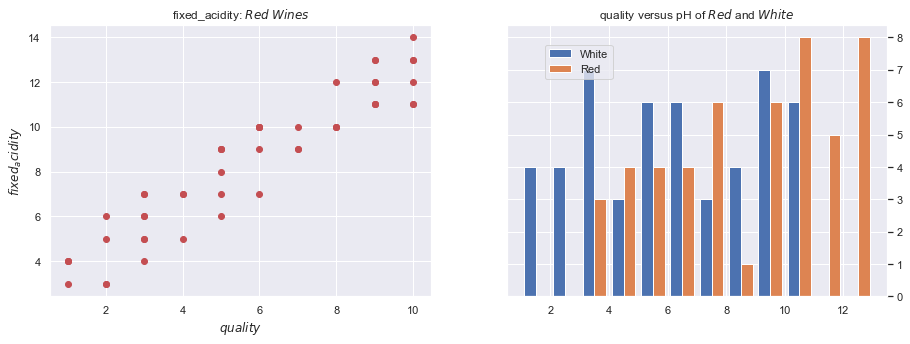

In [72]:
color = np.random.randint(low=1, high=11, size=50)
quality = color + np.random.randint(1, 5, size=color.size)
df_wines = np.column_stack((color, quality))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                figsize=(15, 5))

ax1.scatter(x=color, y=quality, marker='o', c='r', edgecolor='r')
ax1.set_title('fixed_acidity: $Red$ $Wines$')
ax1.set_xlabel('$quality$')
ax1.set_ylabel('$fixed_acidity$')

ax2.hist(df_wines, bins=np.arange(df_wines.min(), df_wines.max()),
          label=('White', 'Red'))
ax2.legend(loc=(0.10, 0.8))
ax2.set_title('quality versus pH of $Red$ and $White$')
ax2.yaxis.tick_right()

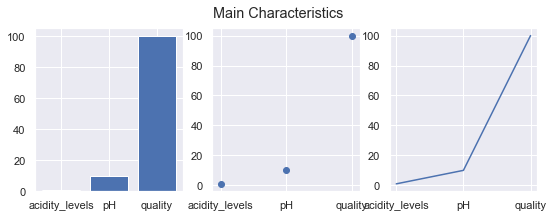

In [73]:
names = ['acidity_levels', 'pH', 'quality']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Main Characteristics')
plt.show()

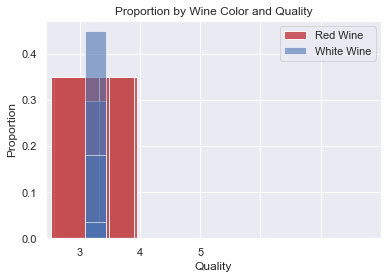

In [74]:
# Plotando o gráfico de barras.
red_bars = plt.bar(red_proportions, width, color='r', alpha=.9, label='Red Wine')
white_bars = plt.bar(width, white_proportions, width, color='b', alpha=.6, label='White Wine')

plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 4
labels = ['3', '4', '5']
plt.xticks(locations, labels)
plt.legend()

In [75]:
red_proportions['9'] = 0
red_proportions




quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [76]:
correlations = df_white.corr()
correlations['quality']

fixed_acidity          -0.113663
volatile_acidity       -0.031648
citric_acid            -0.009209
residual_sugar         -0.097577
chlorides              -0.209934
free_sulfur_dioxide     0.008158
total_sulfur_dioxide   -0.174737
density                -0.026099
pH                      0.099427
sulphates               0.053678
alcohol                -0.015277
quality                 1.000000
Name: quality, dtype: float64

In [77]:
correlations = df_red.corr()
correlations['quality']

fixed_acidity           0.124052
volatile_acidity       -0.090131
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.025787
pH                     -0.057731
sulphates               0.251397
alcohol                 0.022593
quality                 1.000000
Name: quality, dtype: float64

## Preparando para iniciar os Modelos Preditivos de Machine Learning

In [78]:
df_wines = pd.read_csv(r'C:\Users\USER\Desktop\Lopes\winequality.csv', encoding = "latin1")

In [79]:
correlations = df_wines.corr()
correlations['quality']

fixed acidity          -0.076743
volatile acidity       -0.054251
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.029857
pH                      0.019506
sulphates               0.038485
alcohol                -0.006184
quality                 1.000000
Name: quality, dtype: float64

Retirando features de correlação negativa com a qualidade do vinho.

In [80]:
columns = df_wines.columns.drop(['type', 'fixed acidity', 'volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol'])

In [81]:
columns

Index(['citric acid', 'residual sugar', 'free sulfur dioxide', 'pH',
       'sulphates', 'quality'],
      dtype='object')

In [82]:
## Utilizando Machine Learning para realizar a previsão

Separando dados de treino e de teste.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_wines[columns],df_wines['quality'], test_size=0.20, random_state=42)

In [84]:
## Instanciando o modelo 

In [85]:
lr = LinearRegression()

## Treinando o algoritmo e gerando o modelo de regressão

In [86]:
model = lr.fit(X_train,y_train)

In [87]:
# Realizando a predição

In [88]:
resultado = model.predict(X_test)

In [89]:
# Calculando o erro médio quadrático

In [90]:
mean_squared_error(y_test, resultado)

9.425370777188742e-31

In [91]:
# Computando o Score

In [92]:
model.score(X_test,y_test)

1.0

In [93]:
# Comparando os resultados aplicando os dados de treinamento

In [94]:
resultado_treino = model.predict(X_train)

In [95]:
mean_squared_error(y_train, resultado_treino)

9.712005554801499e-31

In [96]:
model.score(X_train,y_train)

1.0

## Testando os resultados utilizando um modelo baseado em Árvore de Decisão

In [97]:
tree = DecisionTreeRegressor()

In [98]:
# Treinando o algoritmo e gerando o modelo

In [99]:
model_tree = tree.fit(X_train,y_train)

In [100]:
resultado_tree = tree.predict(X_test)

In [101]:
# Calculando o erro médio quadrático

In [102]:
mean_squared_error(y_test, resultado_tree)

0.0

In [103]:
# Computando o Score

In [104]:
model_tree.score(X_test,y_test)

1.0

In [105]:
# Testando os resultados utilizando o Random Forest

In [106]:
tree_rf = RandomForestRegressor()

In [107]:
# Treinando o algoritmo e gerando o modelo

In [108]:
model_rf = tree_rf.fit(X_train, y_train)

In [109]:
resultado_rf = model_rf.predict(X_test)

In [110]:
# Calculando o erro médio quadrático

In [111]:
mean_squared_error(y_test, resultado_rf)

0.0

In [112]:
# Computando o Score

In [113]:
model_rf.score(X_test,y_test)

1.0

In [114]:
# Ajustando os hiperparametros do Random Forest
# Especificando os parametros de tunning

In [115]:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

In [116]:
# Instanciando o RandomForest e GridSearch

In [117]:
rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametros)

In [118]:
# Executando o grid

In [119]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [120]:
# Verificando os melhores parâmetros

In [121]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [122]:
# Recuperando o melhor estimator

In [123]:
rf_best = grid.best_estimator_

In [124]:
# Gerando o resultado final

In [125]:
resultado_final = rf_best.predict(X_test)

In [126]:
# Calculando o erro médio quadrático

In [127]:
mean_squared_error(y_test, resultado_final)

0.0

In [128]:
# Computando o Score

In [129]:
rf_best.score(X_test,y_test)

1.0

Final do Teste.  

# Autor: André Luis M. Pinto